MyMe-Health - C23-PC650
Data Analysis: The application will perform data analysis on the test results and provide accurate mental health detection results based on the analysis.


Model 1 menggunakan Supervised Machine Learning dengan Classification

Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:

# File csv diupload di google colab
file_path = '/PHQ9_Results.csv'

# Membaca data dari variabel yang diberi nama df
df = pd.read_csv(file_path)

# Menampilkan df
print(df)


FileNotFoundError: ignored

In [ ]:
import pandas as pd
from google.colab import files
file_path = files.upload()

Saving PHQ9_Results.csv to PHQ9_Results.csv


In [ ]:
import io
df=pd.read_csv(io.StringIO(file_path['PHQ9_Results.csv'].decode('utf-8')))

In [ ]:
# Data yang dimiliki diberi nama 'df'
# Ekstrak 9 pertanyaan PHQ-9 ke dalam X
X = df[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']]

# Nilai y berupa pembagian 5 kelas berdasarkan total skor
y = pd.cut(df['Total'], bins=[-float('inf'), 5, 9, 14, 19, float('inf')], labels=['Normal', 'Minimal Symptoms', 'Minor Depression', 'Major Depression', 'Severe'])

# Split data menjadi training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan shape
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)


Training data shape: (6305, 9) (6305,)
Test data shape: (1577, 9) (1577,)


In [ ]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
       DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090
196        0       0       0       0       0       0       0       0       0
5812       0       0       0       1       0       0       0       0       0
3527       0       0       0       0       0       0       0       0       0
415        1       0       0       1       0       0       0       0       0
5579       0       0       0       1       0       0       0       0       0
Type of X_train: <class 'pandas.core.frame.DataFrame'>


In [ ]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 196     Normal
5812    Normal
3527    Normal
415     Normal
5579    Normal
Name: Total, dtype: category
Categories (5, object): ['Normal' < 'Minimal Symptoms' < 'Minor Depression' <
                         'Major Depression' < 'Severe']
Type of y_train: <class 'pandas.core.series.Series'>


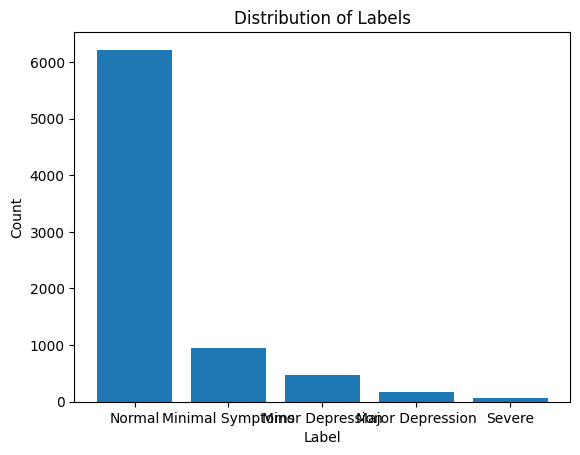

In [ ]:
label_counts = y.value_counts()

# Plot the bar plot
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()








COBA-COBA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memuat dataset PHQ-9
dataset = df

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Membangun model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9226379201014585
Classification Report:
                  precision    recall  f1-score   support

Major Depression       0.58      0.61      0.60        41
Minimal Symptoms       0.79      0.74      0.77       190
Minor Depression       0.69      0.64      0.66       100
          Normal       0.98      0.99      0.98      1229
          Severe       0.63      0.71      0.67        17

        accuracy                           0.92      1577
       macro avg       0.73      0.74      0.73      1577
    weighted avg       0.92      0.92      0.92      1577



In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Melatih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9961953075459734
Classification Report:
                  precision    recall  f1-score   support

Major Depression       0.97      0.88      0.92        41
Minimal Symptoms       1.00      1.00      1.00       190
Minor Depression       0.95      1.00      0.98       100
          Normal       1.00      1.00      1.00      1229
          Severe       1.00      0.94      0.97        17

        accuracy                           1.00      1577
       macro avg       0.99      0.96      0.97      1577
    weighted avg       1.00      1.00      1.00      1577



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
